In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('computer_hardware', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('computer_hardware', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('computer_hardware')
num_tries = 15

# Scalar network with one hidden layer

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])
model = model_fun()

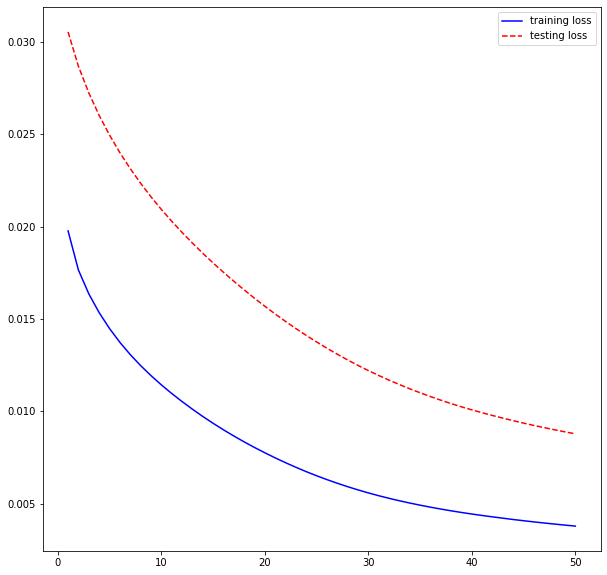

Elapsed training time: 3.46996 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [4]:
test_model(model, train_dataset, test_dataset, epochs=50, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

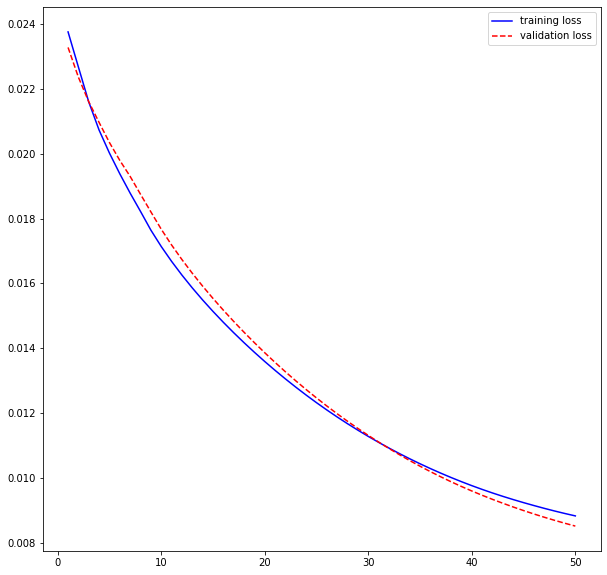

Elapsed k-fold validation time: 10.84388 sec
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [5]:
validate_model(model_fun, datasets_generator_fun(), epochs=50, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 2.17617 sec
Last measures: [0.007665897253900766, 0.008654000237584114, 0.03687860444188118, 0.007464648224413395, 0.03687860444188118, 0.006424653343856335, 0.008344538509845734, 0.007312296889722347, 0.007900635711848736, 0.03687860444188118]


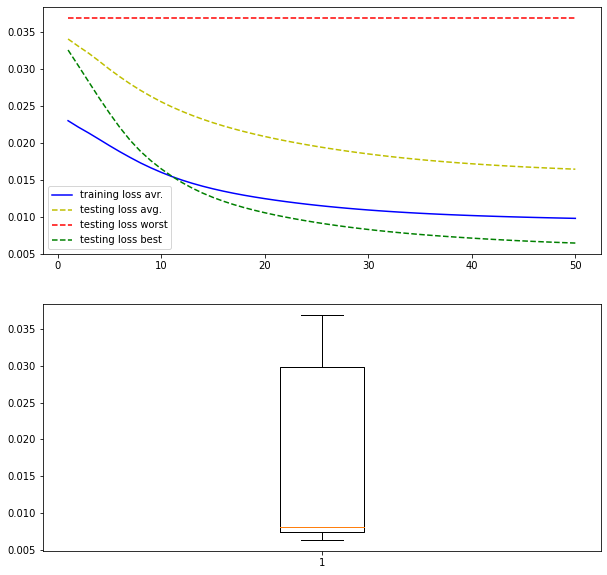

In [6]:
test_model_multiple(model_fun, train_dataset, test_dataset, epochs=50, num_tries=10, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

In [ ]:
validate_model_multiple(model_fun, datasets_generator_fun, epochs=50, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")